In [37]:
import elementpath
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense
from keras.layers import Activation, Dropout, Flatten, Dense
import keras, tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img

from PIL import Image
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator#, load_img
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from keras import optimizers
import os
import cv2

## Gathering all dataset images

In [22]:
! unzip MaskDataset1.zip

Archive:  MaskDataset1.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksksss115.xml  
  inflating: annotations/maksssksksss11

In [1]:
! unzip MaskDataset2.zip

Archive:  MaskDataset2.zip
   creating: with_mask/
 extracting: with_mask/10-with-mask.jpg  
 extracting: with_mask/101-with-mask.jpg  
 extracting: with_mask/1-with-mask.jpg  
 extracting: with_mask/100-with-mask.jpg  
 extracting: with_mask/105-with-mask.jpg  
 extracting: with_mask/11-with-mask.jpg  
 extracting: with_mask/0-with-mask.jpg  
 extracting: with_mask/103-with-mask.jpg  
 extracting: with_mask/107-with-mask.jpg  
 extracting: with_mask/106-with-mask.jpg  
 extracting: with_mask/104-with-mask.jpg  
 extracting: with_mask/109-with-mask.jpg  
 extracting: with_mask/110-with-mask.jpg  
 extracting: with_mask/108-with-mask.jpg  
 extracting: with_mask/114-with-mask.jpg  
 extracting: with_mask/113-with-mask.jpg  
 extracting: with_mask/112-with-mask.jpg  
 extracting: with_mask/111-with-mask.jpg  
 extracting: with_mask/116-with-mask.jpg  
 extracting: with_mask/115-with-mask.jpg  
 extracting: with_mask/117-with-mask.jpg  
 extracting: with_mask/118-with-mask.jpg  
 extracti

In [2]:
! unzip MaskDataset3.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/with_mask/1890.png  
  inflating: Dataset/with_mask/1891.png  
  inflating: Dataset/with_mask/1892.png  
  inflating: Dataset/with_mask/1893.png  
  inflating: Dataset/with_mask/1894.png  
  inflating: Dataset/with_mask/1895.png  
  inflating: Dataset/with_mask/1896.png  
  inflating: Dataset/with_mask/1897.png  
  inflating: Dataset/with_mask/1898.png  
  inflating: Dataset/with_mask/1899.png  
  inflating: Dataset/with_mask/19.png  
  inflating: Dataset/with_mask/190.png  
  inflating: Dataset/with_mask/1900.png  
  inflating: Dataset/with_mask/1901.png  
  inflating: Dataset/with_mask/1902.png  
  inflating: Dataset/with_mask/1903.png  
  inflating: Dataset/with_mask/1904.png  
  inflating: Dataset/with_mask/1905.png  
  inflating: Dataset/with_mask/1906.png  
  inflating: Dataset/with_mask/1907.png  
  inflating: Dataset/with_mask/1908.png  
  inflating: Dataset/with_mask/1909.png  
  inflating: Dataset/with_ma

## Combining all the dataset

In [15]:
!pip install elementpath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import elementpath
import xml.etree.ElementTree as ET

In [48]:
list_image = []
list_class = []

In [49]:
list_annotations = os.listdir("MaskDataset1/annotations")

In [50]:
for file in list_annotations:
    image = f"MaskDataset1/images/{file}"
    list_image.append(image.replace('.xml', '.png'))
    tree = ET.parse(f"MaskDataset1/annotations/{file}")
    root = tree.getroot()
    list_class.append(root[4][0].text)


In [51]:

list_withmask1 = os.listdir("MaskDataset2/with_mask")
list_withoutmask1 = os.listdir("MaskDataset2/without_mask")

In [52]:
for file in list_withmask1:
    image = f"MaskDataset2/with_mask/{file}"
    list_image.append(image)
    list_class.append("with_mask")

for file in list_withoutmask1:
    image = f"MaskDataset2/without_mask/{file}"
    list_image.append(image)
    list_class.append("without_mask")

In [53]:
list_withmask2 = os.listdir("MaskDataset3/with_mask")
list_withoutmask2 = os.listdir("MaskDataset3/without_mask")
list_incorrectmask2 = os.listdir("MaskDataset3/mask_weared_incorrect")

In [54]:

for file in list_withmask2:
    image = f"MaskDataset3/with_mask/{file}"
    list_image.append(image)
    list_class.append("with_mask")

for file in list_withoutmask2:
    image = f"MaskDataset3/without_mask/{file}"
    list_image.append(image)
    list_class.append("without_mask")

for file in list_incorrectmask2:
    image = f"MaskDataset3/mask_weared_incorrect/{file}"
    list_image.append(image)
    list_class.append("mask_weared_incorrect")

In [55]:
df = pd.DataFrame({
        'image': list_image,
        'class': list_class
     })

In [56]:
df.head

<bound method NDFrame.head of                                              image                  class
0          MaskDataset1/images/maksssksksss405.png              with_mask
1          MaskDataset1/images/maksssksksss314.png              with_mask
2          MaskDataset1/images/maksssksksss537.png           without_mask
3          MaskDataset1/images/maksssksksss701.png           without_mask
4          MaskDataset1/images/maksssksksss435.png              with_mask
...                                            ...                    ...
11206    MaskDataset3/mask_weared_incorrect/13.png  mask_weared_incorrect
11207   MaskDataset3/mask_weared_incorrect/619.png  mask_weared_incorrect
11208   MaskDataset3/mask_weared_incorrect/105.png  mask_weared_incorrect
11209  MaskDataset3/mask_weared_incorrect/1495.png  mask_weared_incorrect
11210  MaskDataset3/mask_weared_incorrect/2182.png  mask_weared_incorrect

[11211 rows x 2 columns]>

## Creating Training Data

In [142]:
len(list_image)

11211

In [143]:
len(list_class)

11211

In [104]:
canny_image = []

In [144]:
canny_image = []
for path in list_image:
    img = cv2.imread(path, 0)
    edges = cv2.Canny(img, 100, 200)
    edges = cv2.resize(edges, (200, 200))
    edges = edges.flatten()
    canny_image.append(edges)

In [145]:
print(len(canny_image))
train_canny = canny_image[:10000]
test_canny = canny_image[10000:]

11211


In [146]:
print(len(train_canny))
print(len(test_canny))

10000
1211


In [147]:
one_hot = []
for cl in list_class:
    if cl == "with_mask":
        one_hot.append([0, 0, 1])
    if cl == "without_mask":
        one_hot.append([0, 1, 0])
    if cl == "mask_weared_incorrect":
        one_hot.append([1,0,0])
train_one_hot = one_hot[:10000]
test_one_hot = one_hot[10000:]

print(len(train_one_hot))
print(len(test_one_hot))

10000
1211


In [148]:
df = pd.DataFrame({
        'image': canny_image,
        'class': list_class
     })

In [149]:
df.head()

,image,class
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41,...",with_mask
1,"[0, 0, 106, 234, 43, 0, 0, 0, 0, 0, 0, 0, 0, 0...",with_mask
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",without_mask
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",without_mask
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",with_mask


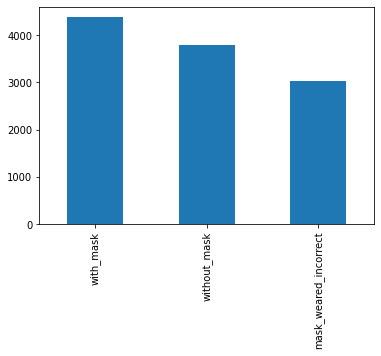

In [150]:
df['class'].value_counts().plot.bar()

## Train Model

In [151]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
total_train = train.shape[0]
total_val = test.shape[0]

In [152]:
import tensorflow as tf
from keras import models, layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(40000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               20480512  
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 3)                 387       
                                                                 
Total params: 20,645,123
Trainable params: 20,645,123
Non-trainable params: 0
_________________________________________________________________


In [153]:
path_to_model="Models"
path_to_logs = "Logs"
checkpointer_new = keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/Canny_First_Test.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

In [154]:
history = model.fit(x=np.array(train_canny), y=np.array(train_one_hot), 
          epochs=30, validation_data=(np.array(test_canny), np.array(test_one_hot)),
          callbacks=[checkpointer_new]
          )

Epoch 1/30
313/313 [==============================] - ETA: 0s - loss: 37.1156 - accuracy: 0.6708
Epoch 1: val_accuracy improved from -inf to 0.68043, saving model to Models/Canny_First_Test.h5
313/313 [==============================] - 43s 136ms/step - loss: 37.1156 - accuracy: 0.6708 - val_loss: 5.1192 - val_accuracy: 0.6804
Epoch 2/30
313/313 [==============================] - ETA: 0s - loss: 2.1854 - accuracy: 0.8159
Epoch 2: val_accuracy improved from 0.68043 to 0.70272, saving model to Models/Canny_First_Test.h5
313/313 [==============================] - 40s 126ms/step - loss: 2.1854 - accuracy: 0.8159 - val_loss: 4.1468 - val_accuracy: 0.7027
Epoch 3/30
313/313 [==============================] - ETA: 0s - loss: 0.9698 - accuracy: 0.8793
Epoch 3: val_accuracy improved from 0.70272 to 0.78200, saving model to Models/Canny_First_Test.h5
313/313 [==============================] - 40s 126ms/step - loss: 0.9698 - accuracy: 0.8793 - val_loss: 3.1141 - val_accuracy: 0.7820
Epoch 4/30
313

## Visualize Data

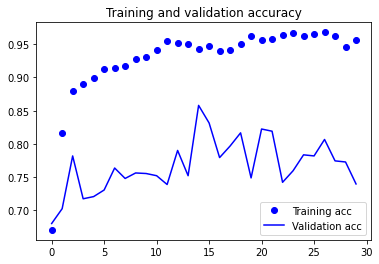

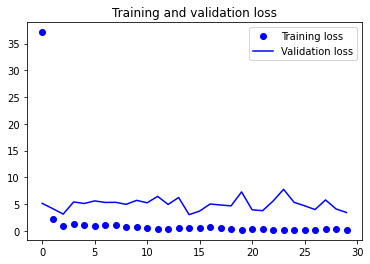

In [155]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()